### Feature selection using SelectFromModel and LassoCV
#### June 2020

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_diabetes
%matplotlib inline

In [4]:
df = load_diabetes()

In [10]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
X = df['data']

In [15]:
feature_names = df['feature_names']
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [14]:
y = df['target']

In [17]:
model = LassoCV().fit(X,y)

In [26]:
idx_sort = np.abs(model.coef_).argsort()

In [29]:
# we want to filter the first 3 features with most influences
model.coef_[idx_sort[-4]]

321.06689245006095

In [30]:
threshold = model.coef_[idx_sort[-4]]+0.1

In [68]:
idx_sort[-3:]

array([2, 4, 8], dtype=int64)

In [69]:
#sort indeces descendingly for feature selection
des_idx_sort = (-np.abs(model.coef_)).argsort()[:3]

In [70]:
selected_features = np.array(feature_names)[des_idx_sort]

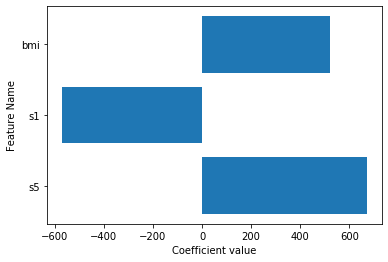

In [71]:
plt.barh(selected_features, model.coef_[des_idx_sort])
plt.xlabel('Coefficient value')
plt.ylabel('Feature Name')
plt.show()

In [65]:
# Repeat the same thing but using SelectFromModel transform
clf = LassoCV()
sfm = SelectFromModel(estimator=clf, threshold=threshold)
sfm.fit_transform(X,y)

array([[ 0.06169621, -0.0442235 ,  0.01990842],
       [-0.05147406, -0.00844872, -0.06832974],
       [ 0.04445121, -0.04559945,  0.00286377],
       ...,
       [-0.01590626, -0.03734373, -0.04687948],
       [ 0.03906215,  0.01631843,  0.04452837],
       [-0.0730303 ,  0.08374012, -0.00421986]])

### It has three columns each stands for one selected feature.